In [6]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
from scipy import stats 
import string
import seaborn as sns

plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
smallfs = 8
bigfs = 10

plt.rcParams.update({'font.size': bigfs, 'axes.titlesize':bigfs})
plt.rc('axes', labelsize=bigfs)    # fontsize of the x and y labels
plt.rc('legend',fontsize=smallfs)
plt.rc('xtick', labelsize=smallfs)    # fontsize of the tick labels
plt.rc('ytick', labelsize=smallfs)    # fontsize of the tick labels

def truncate_colormap(cmapIn='jet', minval=0.0, maxval=1.0, n=100):
    '''truncate_colormap(cmapIn='jet', minval=0.0, maxval=1.0, n=100)'''    
    cmapIn = plt.get_cmap(cmapIn)
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmapIn.name, a=minval, b=maxval),
        cmapIn(np.linspace(minval, maxval, n)))
    return new_cmap

cmapRedish = truncate_colormap(cmapIn="Reds", minval=.0, maxval=.6) 

def get_ax_size(ax, fig):
    bbox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    width, height = bbox.width, bbox.height
    return width, height




In [7]:
num_bins = 31

In [8]:
def plot_SA(d, t):
    fig, axs= plt.subplot_mosaic([
        ["X", "X", "X", "X", "X", "X", ".", "C", ".", ".", ".", "a", "a", "a", "b", "b", "b", "c", "c", "c"], 
        ["X", "X", "X", "X", "X", "X", ".", "C", ".", ".", ".", "d", "d", "d", "e", "e", "e", "f", "f", "f"], 
        ["X", "X", "X", "X", "X", "X", ".", "C", ".", ".", ".", "g", "g", "g", "h", "h", "h", "i", "i", "i"], 
        ], 
        gridspec_kw={"height_ratios":[1,1,1], "width_ratios":
        [1, 1, 1, 1, 1, 1, 0.2, 0.4,1.5, 1, 0.1, 1, 1.9, 0.2, 1, 1, 1, 1, 1, 1]}
    )
    
    vmax=0.3
    vmin=0
    
    # PANEL (a)    
    a = d.sel({"t":t}).std(dim="id").mean(dim="seed").x
    #a["bc"] = 1/a.bc
    time = r"$t=10^5$" if t==1e5 else  (r"$t=10^4$" if t==1e4  else  (r"$t=10^6$" if t==1e6 else rf"$t=${t:.0e}" ))
    cbarlabel = r"average dispersion"+r" $\sigma$"+"\n"+r"at "+time
    c=a.plot(ax=axs["X"], add_colorbar=False, vmax=vmax,vmin=vmin, cmap=cmapRedish) 
    a.isel({"mu":0}).plot.contour(ax=axs["X"], levels=[0.1], colors="blue")
    axs["X"].text(0.115, 0.25, r"$\sigma<0.1$", fontsize=smallfs, color="blue", ha="right")
    # colorbar (a)
    cb = plt.colorbar(c, cax = axs["C"], extend="max", ticks=[0,0.1,0.2,0.3,0.4], shrink=0.8, aspect=15)
    cb.set_label(cbarlabel, size=bigfs)
    cb.outline.set_edgecolor('k')
    cb.ax.tick_params(labelsize=smallfs)
    cb.outline.set_edgecolor('k')
    # Aesthetics (a)
    axs["X"].set_xlim(0,0.3)
    axs["X"].set_ylim(0.4, 0.)
    axs["X"].text(1.1,1.02,r"disagreement", va="bottom", ha="left", transform = axs["X"].transAxes, fontsize=smallfs)
    axs["X"].text(1.1,-0.05,r"agreement", va="top", ha="left", transform= axs["X"].transAxes, fontsize=smallfs)
    axs["X"].set_ylabel(r"confidence"+"\n"+r"bound $\epsilon$", fontsize=bigfs)
    axs["X"].text(-0.07,0.125,r"weak"+"\n"+r"bias", ha="right", va="center", transform=axs["X"].transAxes, fontsize=smallfs)
    axs["X"].text(-0.07,0.875,r"strong"+"\n"+r"bias", ha="right", va="center", transform=axs["X"].transAxes, fontsize=smallfs)
    axs["X"].text(0.05, -0.17,r"low", ha="left", va="center", transform=axs["X"].transAxes, fontsize=smallfs)
    axs["X"].text(0.95, -0.17,r"high", ha="right", va="center", transform=axs["X"].transAxes, fontsize=smallfs)
    axs["X"].set_yticks([0,0.1,0.2,0.3,0.4])
    axs["X"].set_xticks([0.0,0.1,0.2,0.3])
    axs["X"].set_xticklabels([r"0",r"0.1",r"0.2",r"0.3"], ha="center")
    axs["X"].set_xlabel(r"noise $\nu$", fontsize=bigfs)
    axs["X"].set_title(r"ambiguity noise $\xi_{\rm am}$", fontsize=bigfs, fontdict={"weight":"normal"})
    axs["X"].tick_params(direction='out')
    axs["X"].tick_params(bottom=True, left=True)
    for sp in axs["X"].spines: axs["X"].spines[sp].set_color("k")
    # Locations (a)
    n=int(0);
    letter =[r"$\,a_1$", r"$a_2$", r"$a_3$", r"$\,a_4$", r"$a_5$", r"$a_6$", r"$\,a_7$", r"$a_8$", r"$a_9$"]  
    for bc in bcs:
        for nu in nus:
            ha = "left" if n==0 or n==3 or n==6 else "center"
            axs["X"].text(nu, bc, letter[n], ha=ha, va="center", fontsize=bigfs, color="k", fontdict={"weight":"normal"})#, bbox=dict(facecolor=(1,1,1,0.5), edgecolor=(0,0,0,0)))
            n+=1


    # PANEL (b)
    n=int(0); normalletters=["a", "b", "c", "d", "e", "f", "g", "h", "i"]
    for nb, bc in enumerate(bcs):
        bc = d.bc[np.isclose(d.bc.values, bc)].values[0]
        for nnu, nu in enumerate(nus):
            nu = d.nu[np.isclose(d.nu.values, nu)].values[0]
            ax = axs[normalletters[n]]
            #print(bc, nu)
            for nn, s in enumerate(seeds):
                
                x = d.sel({"t":t, "seed":s, "bc":bc, "nu":nu}).isel({"mu":0}).x
                #xgrid = np.linspace(0,1, 200)                
                #x = np.concatenate([x, np.ones(20)*2, np.ones(20)*(-1)])
                col = plt.get_cmap("Set1")(nn)
                #kde = stats.gaussian_kde(x, bw_method=max(0.05, nu/2))
                #pdf = kde.evaluate(xgrid)
                #ax.fill_between(xgrid, [0]*len(pdf), len(x)/100*pdf, alpha=0.25, color=col)
                #ns.kdeplot(data=x, ax=ax, color=col, alpha=0.25 )
                ax.hist(x, bins=np.linspace(0,1,num_bins), color=col, alpha=0.25)
            ax.set_xticks([0,0.5,1])
            for axis in ['top','bottom','left','right']:
                ax.spines[axis].set_linewidth(1)
                ax.spines[axis].set_color("black")
                ax.spines[axis].set_zorder(0)
            ax.set_ylim(0,)
            ax.set_xlim(0,1)
            ax.set_yticks([])
            ax.grid(False)
            ax.set_xticklabels([])
            if nb==2:
                ax.set_xticklabels([r"  0", r"0.5", r"1  "])
                if nnu==1:
                    ax.set_xlabel("opinion space", fontsize=bigfs)
            if nb==1 and nnu==2:
                ax.yaxis.set_label_position("right")
                time = r"$t=10^5$" if t==1e5 else  (r"$t=10^4$" if t==1e4  else  (r"$t=10^6$" if t==1e6 else rf"$t=${t:.0e}" ))
                ax.set_ylabel(r"distribution of opinions"+"\n"+r"at "+time, fontsize=bigfs, x=2)
            ax.text(0.05,0.95,letter[n], va="top", ha="left", transform=ax.transAxes, fontsize=smallfs, color="k")
            n+=1
            

    fig.set_size_inches(18/2.54, 13*4/7/2.54, forward=True)
    plt.subplots_adjust(left=0.08, bottom=0.09*7/4, top=1- 0.05*7/4, right=0.95)

    print(get_ax_size(ax=axs["X"],fig= fig))#, get_ax_size(ax=axs["1"], fig= fig))
    return fig, axs

In [9]:
nus=np.array([1e-10, 0.08,0.18])
bcs=np.array([0.05,0.175,0.3])


In [10]:
#seeds=[42,420,112,110,101]
seeds=[120, 4, 5]#,116,4,110,5]



(1.9577271982757223, 2.2080989876265464)
(1.9577271982757223, 2.2080989876265464)


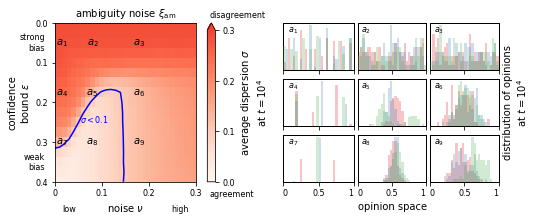

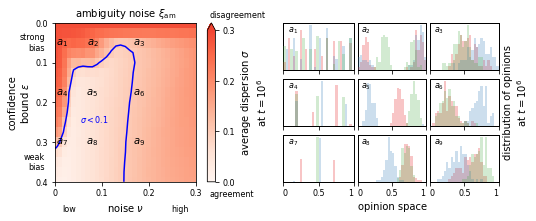

In [11]:
ic = "uniform"
dam = xr.open_dataset(f"../../data/ms2-noise/model_highRes_standard{ic}Initial_seeds0-1000.ncdf", engine="netcdf4")
#dad = xr.open_dataset(f"../../data/ms2-noise/model_highRes_communicationNoise{ic}Initial_seeds0-1000.ncdf", engine="netcdf4")
#dse = xr.open_dataset(f"../../data/ms2-noise/model_highRes_interactionNoise{ic}Initial_seeds0-1000.ncdf", engine="netcdf4")
#dex = xr.open_dataset(f"../../data/ms2-noise/model_highRes_externalNoise{ic}Initial_seeds0-1000.ncdf", engine="netcdf4")

plot_SA(dam, 1e4)
plt.savefig(f"figs/SA_compare_dispersion_full_uniform_t10000_v3.pdf")
plt.savefig(f"figs/SA_compare_dispersion_full_uniform_t10000_v3.png", dpi=300)
plot_SA(dam, 1e6)
plt.savefig(f"figs/SA_compare_dispersion_full_uniform_t1000000_v3.pdf")
plt.savefig(f"figs/SA_compare_dispersion_full_uniform_t1000000_v3.png", dpi=300)


(1.9577271982757223, 2.2080989876265464)
(1.9577271982757223, 2.2080989876265464)
(1.9577271982757223, 2.2080989876265464)
(1.9577271982757223, 2.2080989876265464)


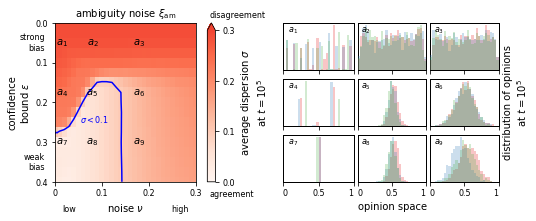

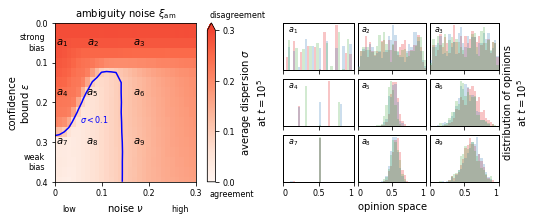

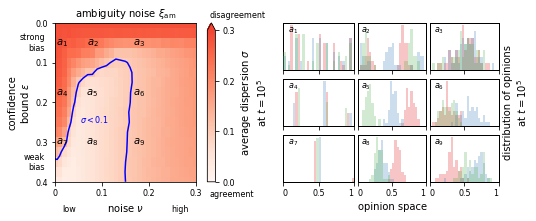

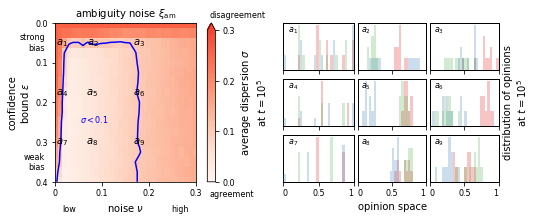

In [15]:
folder = f"../../data/ms2-noise/"
#seeds =  [112,111,116,42,69]
seeds=[120, 4, 5]
d_ns = [
    xr.open_dataset(folder+"model_highRes_n1000uniformInitial_seeds.ncdf", engine="netcdf4"), 
    xr.open_dataset(folder+"model_highRes_n500uniformInitial_seeds.ncdf", engine="netcdf4"), 
    xr.open_dataset(folder+"model_highRes_n50uniformInitial_seeds.ncdf", engine="netcdf4"), 
    xr.open_dataset(folder+"model_highRes_n10uniformInitial_seeds.ncdf", engine="netcdf4"), 
]
for d in d_ns:
    t=1e5
    plot_SA(d, t)
    plt.savefig(f"figs/SA_n{len(d.id)}_compare_dispersion_full_uniform_t100000_v3.pdf")
    plt.savefig(f"figs/SA_n{len(d.id)}_compare_dispersion_full_uniform_t100000_v3.png", dpi=300)


(1.9577271982757223, 2.2080989876265464)
(1.9577271982757223, 2.2080989876265464)


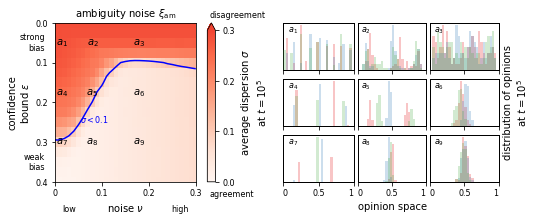

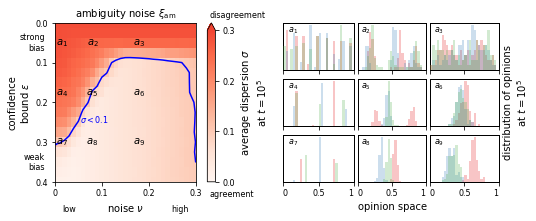

In [16]:
d_mus = [
    xr.open_dataset(folder+"model_highRes_mu0.1uniformInitial_seeds.ncdf", engine="netcdf4"), 
    xr.open_dataset(folder+"model_highRes_mu0.2uniformInitial_seeds.ncdf", engine="netcdf4"), 
]
for d in d_mus:
    t=1e5
    plot_SA(d, t)
    plt.savefig(f"figs/SA_mu{d.mu.values[0]}_compare_dispersion_full_uniform_t100000_v3.pdf")
    plt.savefig(f"figs/SA_mu{d.mu.values[0]}_compare_dispersion_full_uniform_t100000_v3.png", dpi=300)


# Watts Strogatz Network
 

(1.9577271982757223, 2.2080989876265464)
(1.9577271982757223, 2.2080989876265464)
(1.9577271982757223, 2.2080989876265464)
(1.9577271982757223, 2.2080989876265464)
(1.9577271982757223, 2.2080989876265464)
(1.9577271982757223, 2.2080989876265464)
(1.9577271982757223, 2.2080989876265464)
(1.9577271982757223, 2.2080989876265464)
(1.9577271982757223, 2.2080989876265464)


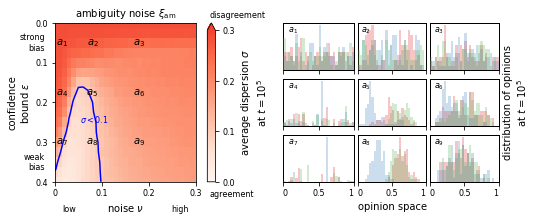

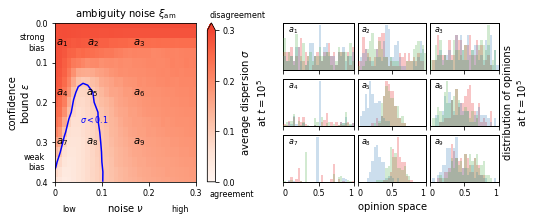

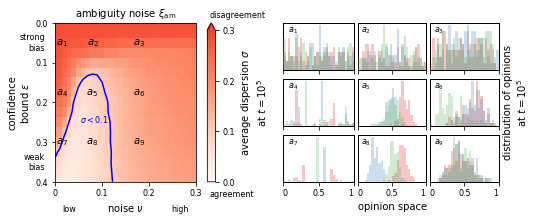

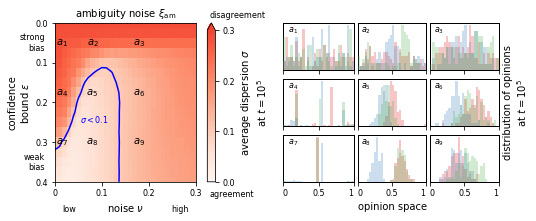

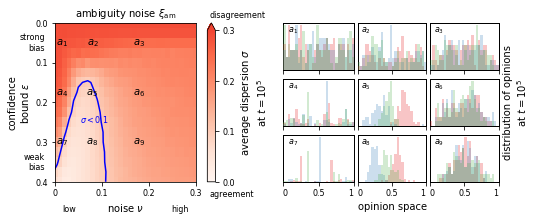

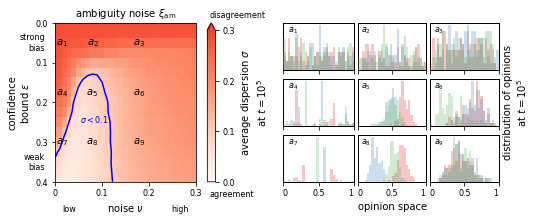

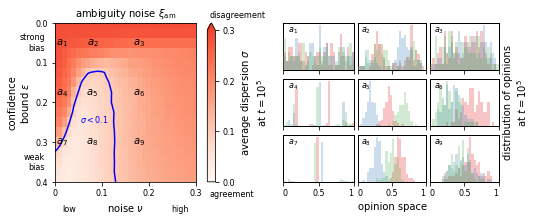

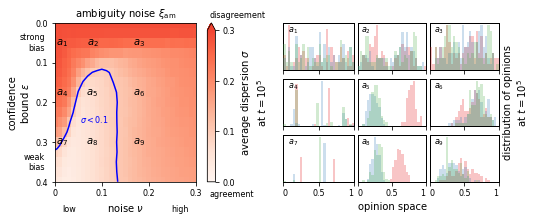

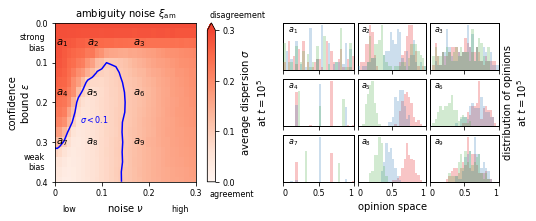

In [17]:
folder = "../../data/ms2-noise/"
for p in [0.0, 0.01, 0.1, 1.0]:
    d_WS = xr.open_dataset(folder+f"model_highRes_WS-6-{p}uniformInitial_seeds.ncdf", engine="netcdf4")
    t = 1e5
    plot_SA(d_WS, t)
    plt.savefig(f"figs/SA_WS-6-{p}_compare_dispersion_full_uniform_t100000_v3.pdf")
    plt.savefig(f"figs/SA_WS-6-{p}_compare_dispersion_full_uniform_t100000_v3.png", dpi=300)
for k in [4,6,8,10,20]:
    p=0.1
    d_WS = xr.open_dataset(folder+f"model_highRes_WS-{k}-{p}uniformInitial_seeds.ncdf", engine="netcdf4")
    t = 1e5
    plot_SA(d_WS, t)
    plt.savefig(f"figs/SA_WS-{k}-{p}_compare_dispersion_full_uniform_t100000_v3.pdf")
    plt.savefig(f"figs/SA_WS-{k}-{p}_compare_dispersion_full_uniform_t100000_v3.png", dpi=300)
